# Credit Card Lead Prediction

About Dataset
Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like telecasting, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross-sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Dataset: https://www.kaggle.com/datasets/sajidhussain3/jobathon-may-2021-credit-card-lead-prediction?select=train.csv

Problem Statement : There are certain features such as "Gender" , "ID" , "Age" , "Region_Code" , "Occupation" , "Channel_Code" , "Vintage" , "Credit_Product" , "Avg_Account_Balance" , "Is_Active" and a target column "Is_Lead"

### Dataset Dictionary

* ID : Unique Identifier for a row

* Gender: Gender of the Customer

* Age : Age of the Customer (in Years)

* Region_Code : Code of the Region for the customers

* Occupation : Occupation Type for the customer

* Channel_Code : Acquisition Channel Code for the Customer (Encoded)

* Vintage : Vintage for the Customer (In Months), Number of Days, Customer has been associated with the company

* Credit_Product : If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

* Avg_Account_Balance : Average Account Balance for the Customer in last 12 Months

* Is_Active : If the Customer is Active in last 3 Months

* Is_Lead(Target) : If the Customer is interested for the Credit Card, 0 / 1: Customer is not interested / interested

In [2]:
# Import Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


4 integer column, 7 object column

In [7]:
train_df.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [8]:
train_df.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

Credit_Product has missing values


In [9]:
train_df.duplicated().sum()

0

There is not duplicate row.

In [10]:
train_df.Credit_Product.unique()

array(['No', nan, 'Yes'], dtype=object)

Fill the lost data as 'Unknown'

In [11]:
train_df['Credit_Product'].fillna('Unknown', inplace=True)
train_df['Credit_Product'].value_counts()

No         144357
Yes         72043
Unknown     29325
Name: Credit_Product, dtype: int64

Number of missing value and number of Unknown are equal.

In [12]:
train_df.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

We have not any missing value.

In [13]:
train_df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [14]:
# Check the unique value of categorical columns
for col in train_df.columns:
    if train_df[col].dtypes == 'object':
        print(col, train_df[col].unique())

ID ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ']
Gender ['Female' 'Male']
Region_Code ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
Occupation ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Channel_Code ['X3' 'X1' 'X2' 'X4']
Credit_Product ['No' 'Unknown' 'Yes']
Is_Active ['No' 'Yes']


ID is not important for model. This is so subjective value. We can drop it.

In [15]:
train_df.drop(['ID'], axis=1, inplace=True)
test_df.drop(['ID'], axis=1, inplace=True)
train_df

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,Unknown,1925586,No,0
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [16]:
train_df.shape

(245725, 10)

### Data Visualization

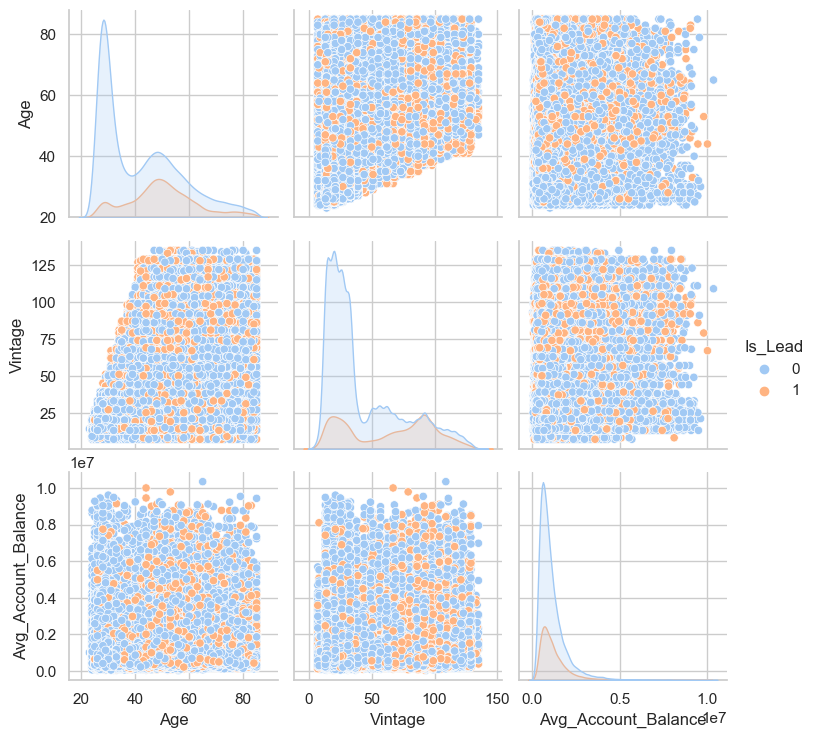

In [17]:
sns.set_theme(style='whitegrid', palette='pastel')
sns.pairplot(data=train_df, hue='Is_Lead');

As you can see 'Avg_Account_Balance' is logaritmic distribution.

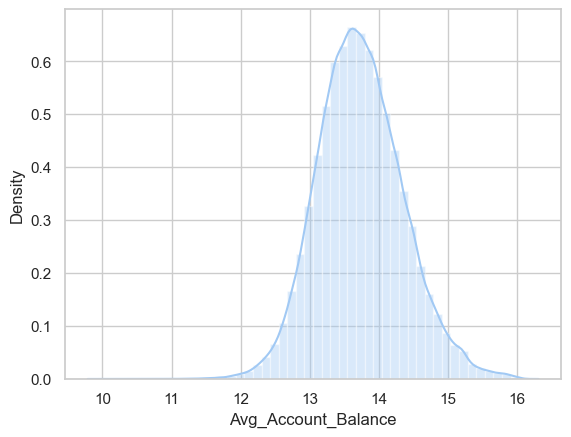

In [18]:
train_df['Avg_Account_Balance'] = np.log(train_df['Avg_Account_Balance'])
sns.distplot(train_df['Avg_Account_Balance'])
plt.show();

We can approximate the distribution to the normal distribution using with numpy log

0    187437
1     58288
Name: Is_Lead, dtype: int64

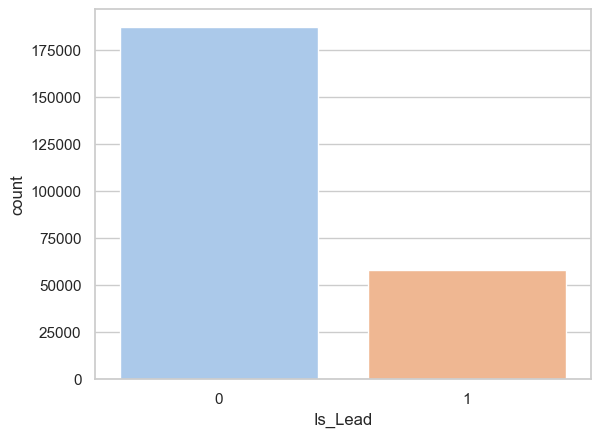

In [19]:
sns.countplot(data=train_df, x='Is_Lead');
train_df.Is_Lead.value_counts()

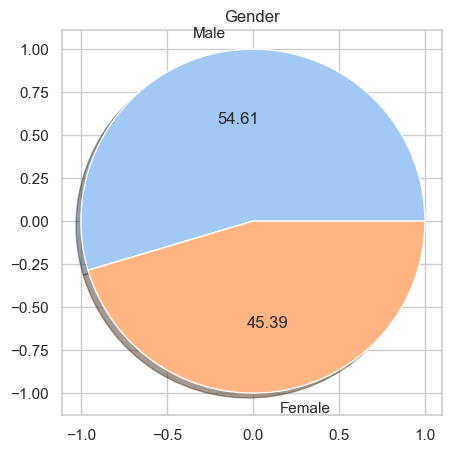

In [20]:
plt.figure(figsize=(5,5))
plt.pie(train_df['Gender'].value_counts(), labels=train_df['Gender'].value_counts().index,autopct='%.2f', shadow=True, frame=True )
plt.title('Gender')
plt.show();

Male      134197
Female    111528
Name: Gender, dtype: int64

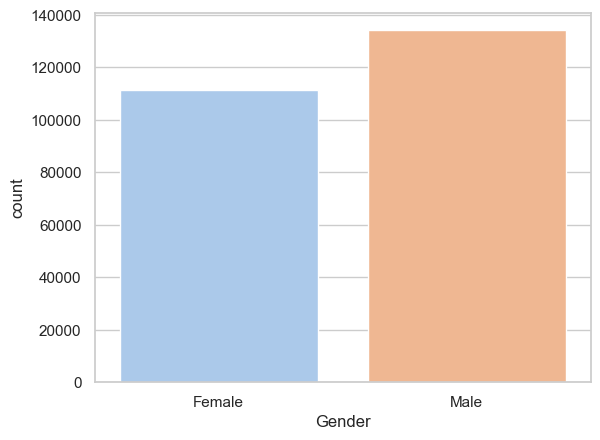

In [21]:
sns.countplot(data=train_df, x='Gender');
train_df.Gender.value_counts()

Male and female numbers are balanced 

No     150290
Yes     95435
Name: Is_Active, dtype: int64

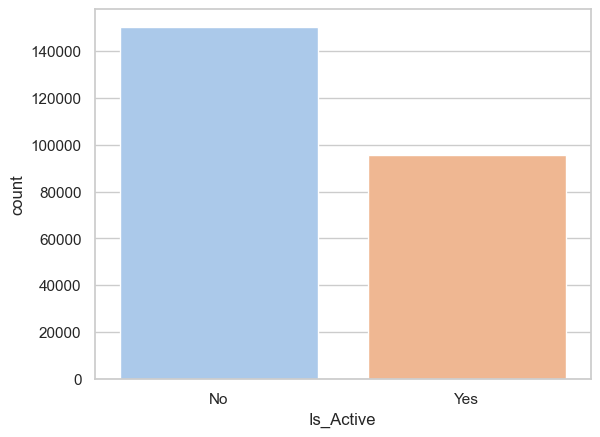

In [22]:
sns.countplot(data=train_df, x='Is_Active');
train_df.Is_Active.value_counts()

There is more inactive customer number

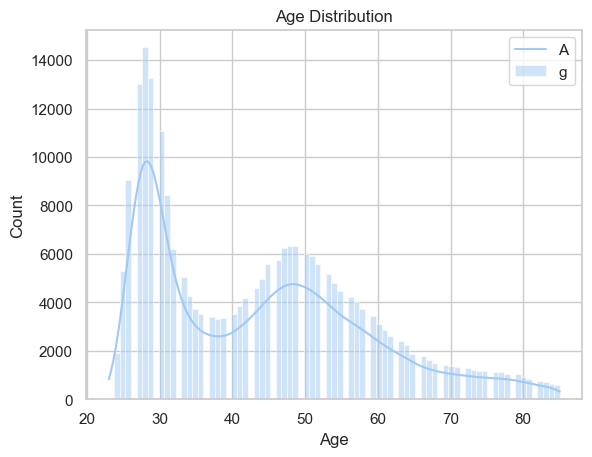

In [23]:
# Age distribution
fig = plt.figure()
ax = sns.histplot(data = train_df, x='Age', kde=True)
ax.set_title('Age Distribution')
ax.legend('Age')
fig.add_subplot(ax);

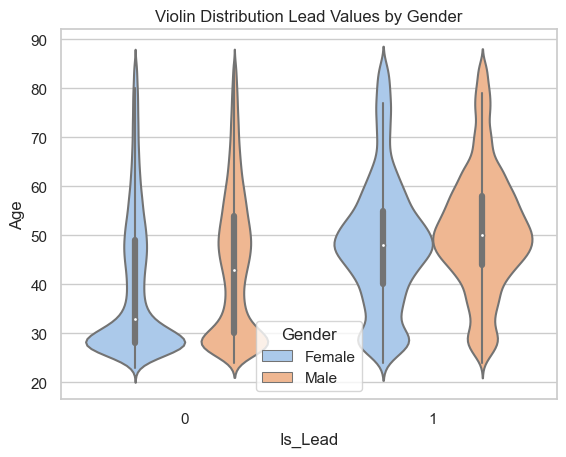

In [24]:
ax = sns.violinplot(data=train_df,x='Is_Lead', y='Age', hue='Gender')
ax.set_title('Violin Distribution Lead Values by Gender');

Customers in the 20-30 and 40-60 range can interested more credit cards.

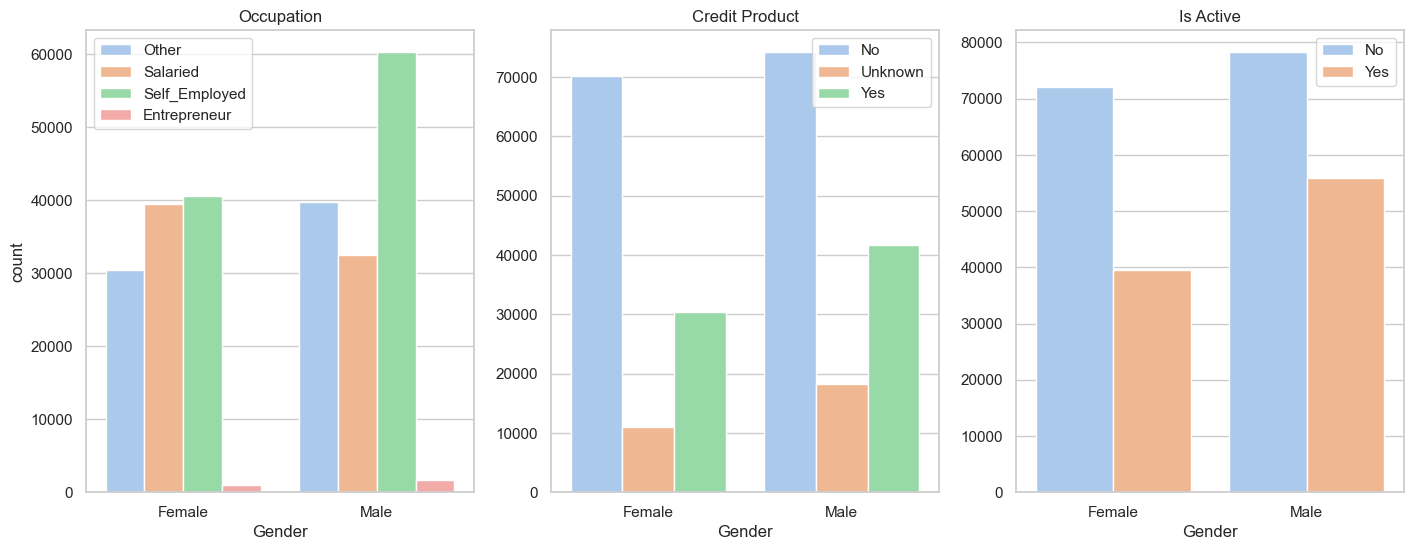

In [25]:
plt.figure(figsize=(17,6))

plt.subplot(1,3,1)
plt.title('Occupation')
plt.ylabel('Count')
plt.xlabel('Gender')
sns.countplot(x=train_df['Gender'],hue='Occupation',data=train_df);
plt.legend()

plt.subplot(1,3,2)
plt.title('Credit Product')
plt.xlabel('Gender')
g1=sns.countplot(x=train_df['Gender'],hue='Credit_Product',data=train_df);
g1.set(ylabel=None)
plt.legend()

plt.subplot(1,3,3)
plt.title('Is Active')
plt.xlabel('Gender')
g1=sns.countplot(x=train_df['Gender'],hue='Is_Active',data=train_df);
plt.legend()
g1.set(ylabel=None)

plt.show();

* The vast majority are self-employed.
* minority are entrepreneurs
* Number of active customer and number of which has not credit product are higher than the others.
* Female and male datas are balanced and consistent.

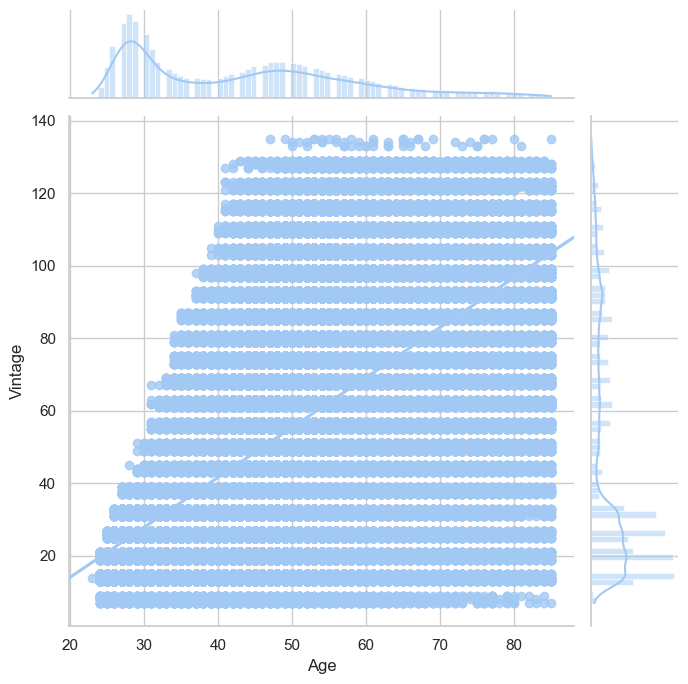

In [26]:
sns.jointplot(x='Age', y='Vintage', data=train_df,
                  kind='reg', truncate=False,
                  color='b', height=7);

We can say that there is a linear relationship between age and vintage.


<Figure size 1500x1500 with 0 Axes>

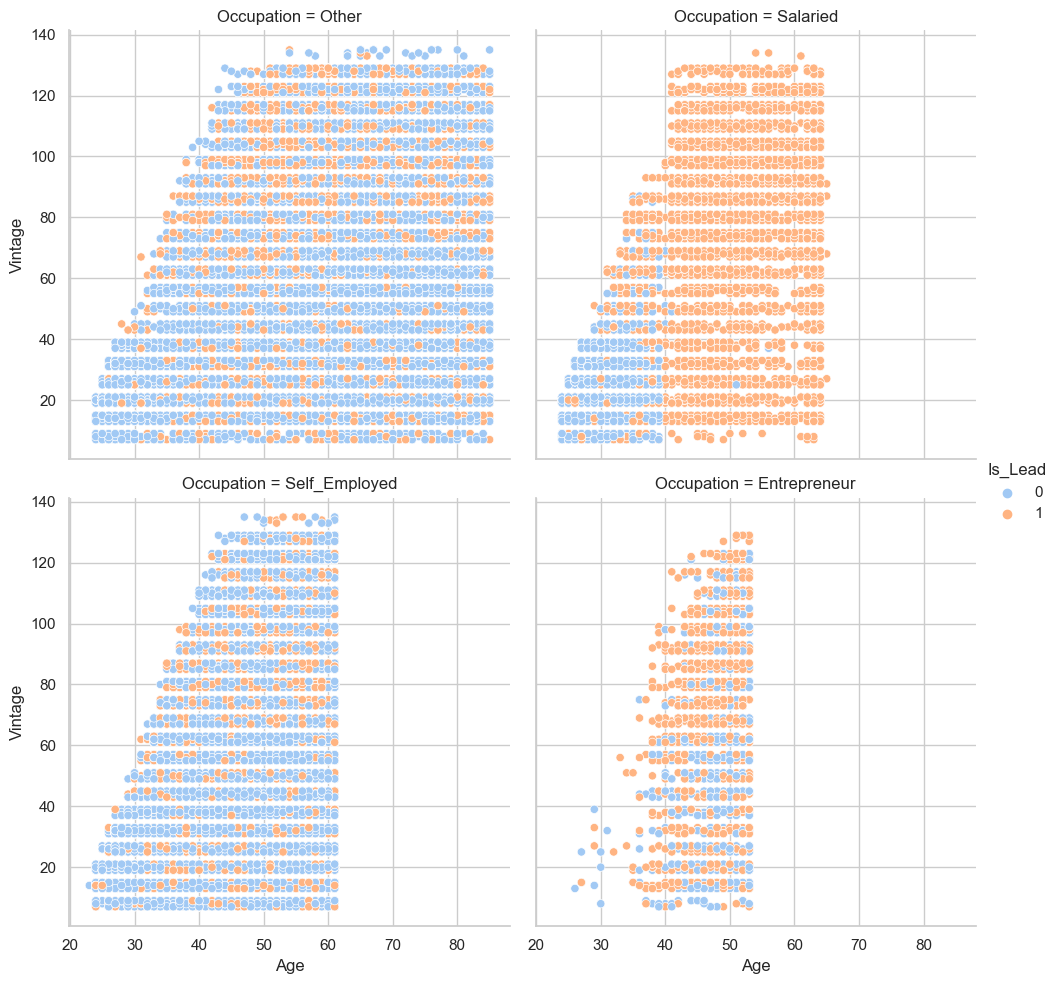

In [27]:
plt.figure(figsize = (15,15))
sns.relplot(data = train_df,x = "Age",y = 'Vintage',hue = "Is_Lead",col = "Occupation",col_wrap = 2);

* Salaried customers are more suitable for credit cards
* Entrepreneurial customers usually between the ages of 35 and 55 apply for a credit card.


**categorik ve numerik diye ayır
encoder ile fitle topla sonra modellemeye başla**

Region code is very subjective value and it is not important for our model like ID. We can drop it.

In [28]:
train_df.drop(['Region_Code'], axis=1, inplace=True)
test_df.drop(['Region_Code'], axis=1, inplace=True)

In [29]:
train_df.head().T

,0,1,2,3,4
Gender,Female,Female,Female,Male,Female
Age,73,30,56,34,30
Occupation,Other,Salaried,Self_Employed,Salaried,Salaried
Channel_Code,X3,X1,X3,X1,X1
Vintage,43,32,26,19,33
Credit_Product,No,No,No,No,No
Avg_Account_Balance,13.860193,13.274205,14.210464,13.061453,13.69536
Is_Active,No,No,Yes,No,No
Is_Lead,0,0,0,0,0


In [30]:
test_df.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Female
Age,29,43,31,29,29
Occupation,Other,Other,Salaried,Other,Other
Channel_Code,X1,X2,X1,X1,X1
Vintage,25,49,14,33,19
Credit_Product,Yes,NaN,No,No,No
Avg_Account_Balance,742366,925537,215949,868070,657087
Is_Active,No,No,No,No,No


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               245725 non-null  object 
 1   Age                  245725 non-null  int64  
 2   Occupation           245725 non-null  object 
 3   Channel_Code         245725 non-null  object 
 4   Vintage              245725 non-null  int64  
 5   Credit_Product       245725 non-null  object 
 6   Avg_Account_Balance  245725 non-null  float64
 7   Is_Active            245725 non-null  object 
 8   Is_Lead              245725 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 16.9+ MB


We have 5 object column. We need to convert numeric values object column with Label Encoder.

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
for cat_val in cat:
    train_df[cat_val] = le.fit_transform(train_df[cat_val])
    test_df[cat_val] = le.fit_transform(test_df[cat_val])

In [33]:
train_df.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,1,2,43,0,13.860193,0,0
1,0,30,2,0,32,0,13.274205,0,0
2,0,56,3,2,26,0,14.210464,1,0
3,1,34,2,0,19,0,13.061453,0,0
4,0,30,2,0,33,0,13.695360,0,0


In [34]:
test_df.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,1,0,25,1,742366,0
1,1,43,1,1,49,2,925537,0
2,1,31,2,0,14,0,215949,0
3,1,29,1,0,33,0,868070,0
4,0,29,1,0,19,0,657087,0


Our all value in dataset converted the numeric values.

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               245725 non-null  int32  
 1   Age                  245725 non-null  int64  
 2   Occupation           245725 non-null  int32  
 3   Channel_Code         245725 non-null  int32  
 4   Vintage              245725 non-null  int64  
 5   Credit_Product       245725 non-null  int32  
 6   Avg_Account_Balance  245725 non-null  float64
 7   Is_Active            245725 non-null  int32  
 8   Is_Lead              245725 non-null  int64  
dtypes: float64(1), int32(5), int64(3)
memory usage: 12.2 MB


In [36]:
# Check the unique value of numeric columns
for col in train_df.columns:
    if train_df[col].dtypes == 'int32':
        print(col, train_df[col].unique())

Gender [0 1]
Occupation [1 2 3 0]
Channel_Code [2 0 1 3]
Credit_Product [0 1 2]
Is_Active [0 1]


In [37]:
for col in train_df.columns:
    if train_df[col].dtypes == 'int64':
        print(col, train_df[col].unique())

Age [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23]
Vintage [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37  74 110  44   9
  68  51  98 105 127 129 133   8   7 128 135 134]
Is_Lead [0 1]


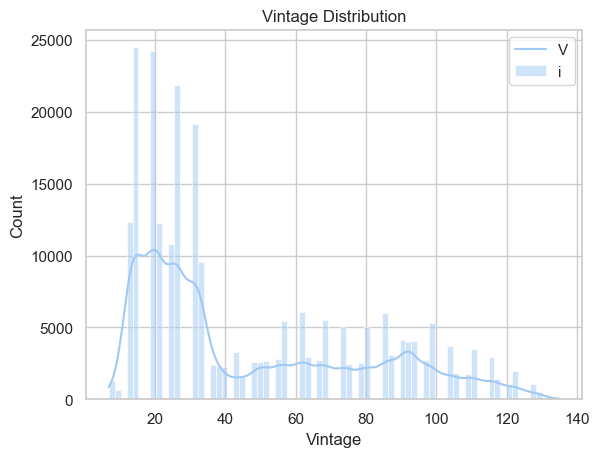

In [38]:
# Vintage distribution
fig = plt.figure()
ax = sns.histplot(data = train_df, x='Vintage', kde=True)
ax.set_title('Vintage Distribution')
ax.legend('Vintage')
fig.add_subplot(ax);

In [39]:
train_df.isna().sum()

Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [40]:
test_df.isna().sum()

Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

Datasets are ready to modelling. 
Firstly, talk about dataset.

train_df include the training data and validation data. We fitting model and evaluating model with train_df. 

test_df include only our features and we just predict label. We use to train_df fitting model and calculate score and other metrics.

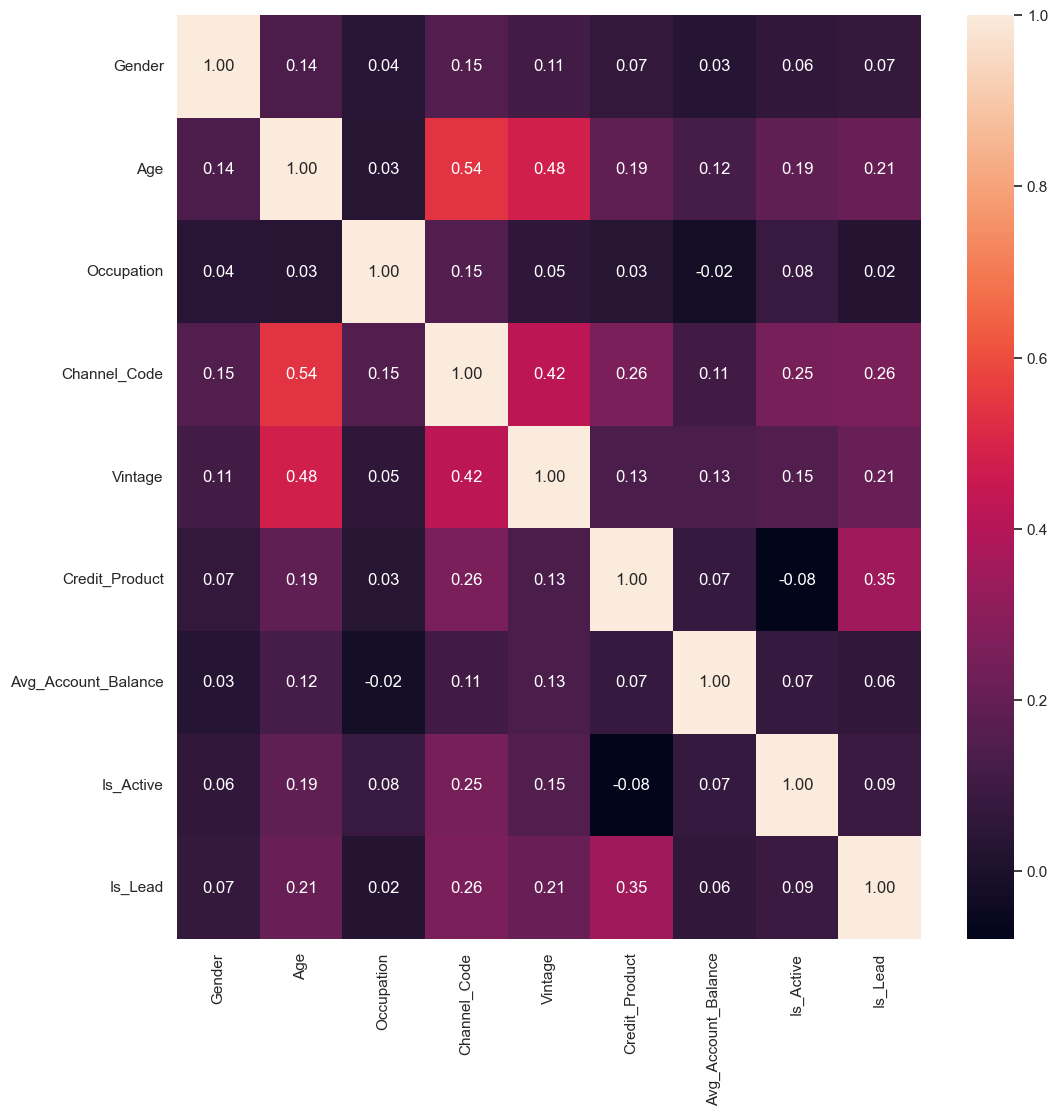

In [41]:
# We can create correlation matrix, all values are numeric
correlation = train_df.corr(method='kendall')
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation, annot=True, fmt='.2f')

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. Now we created a correlation matrix with Seaborn.

In [42]:
train_df.shape

(245725, 9)

The problem is supervised and classification problem. We can check sklearn ML module map and choosing the which have high score module.

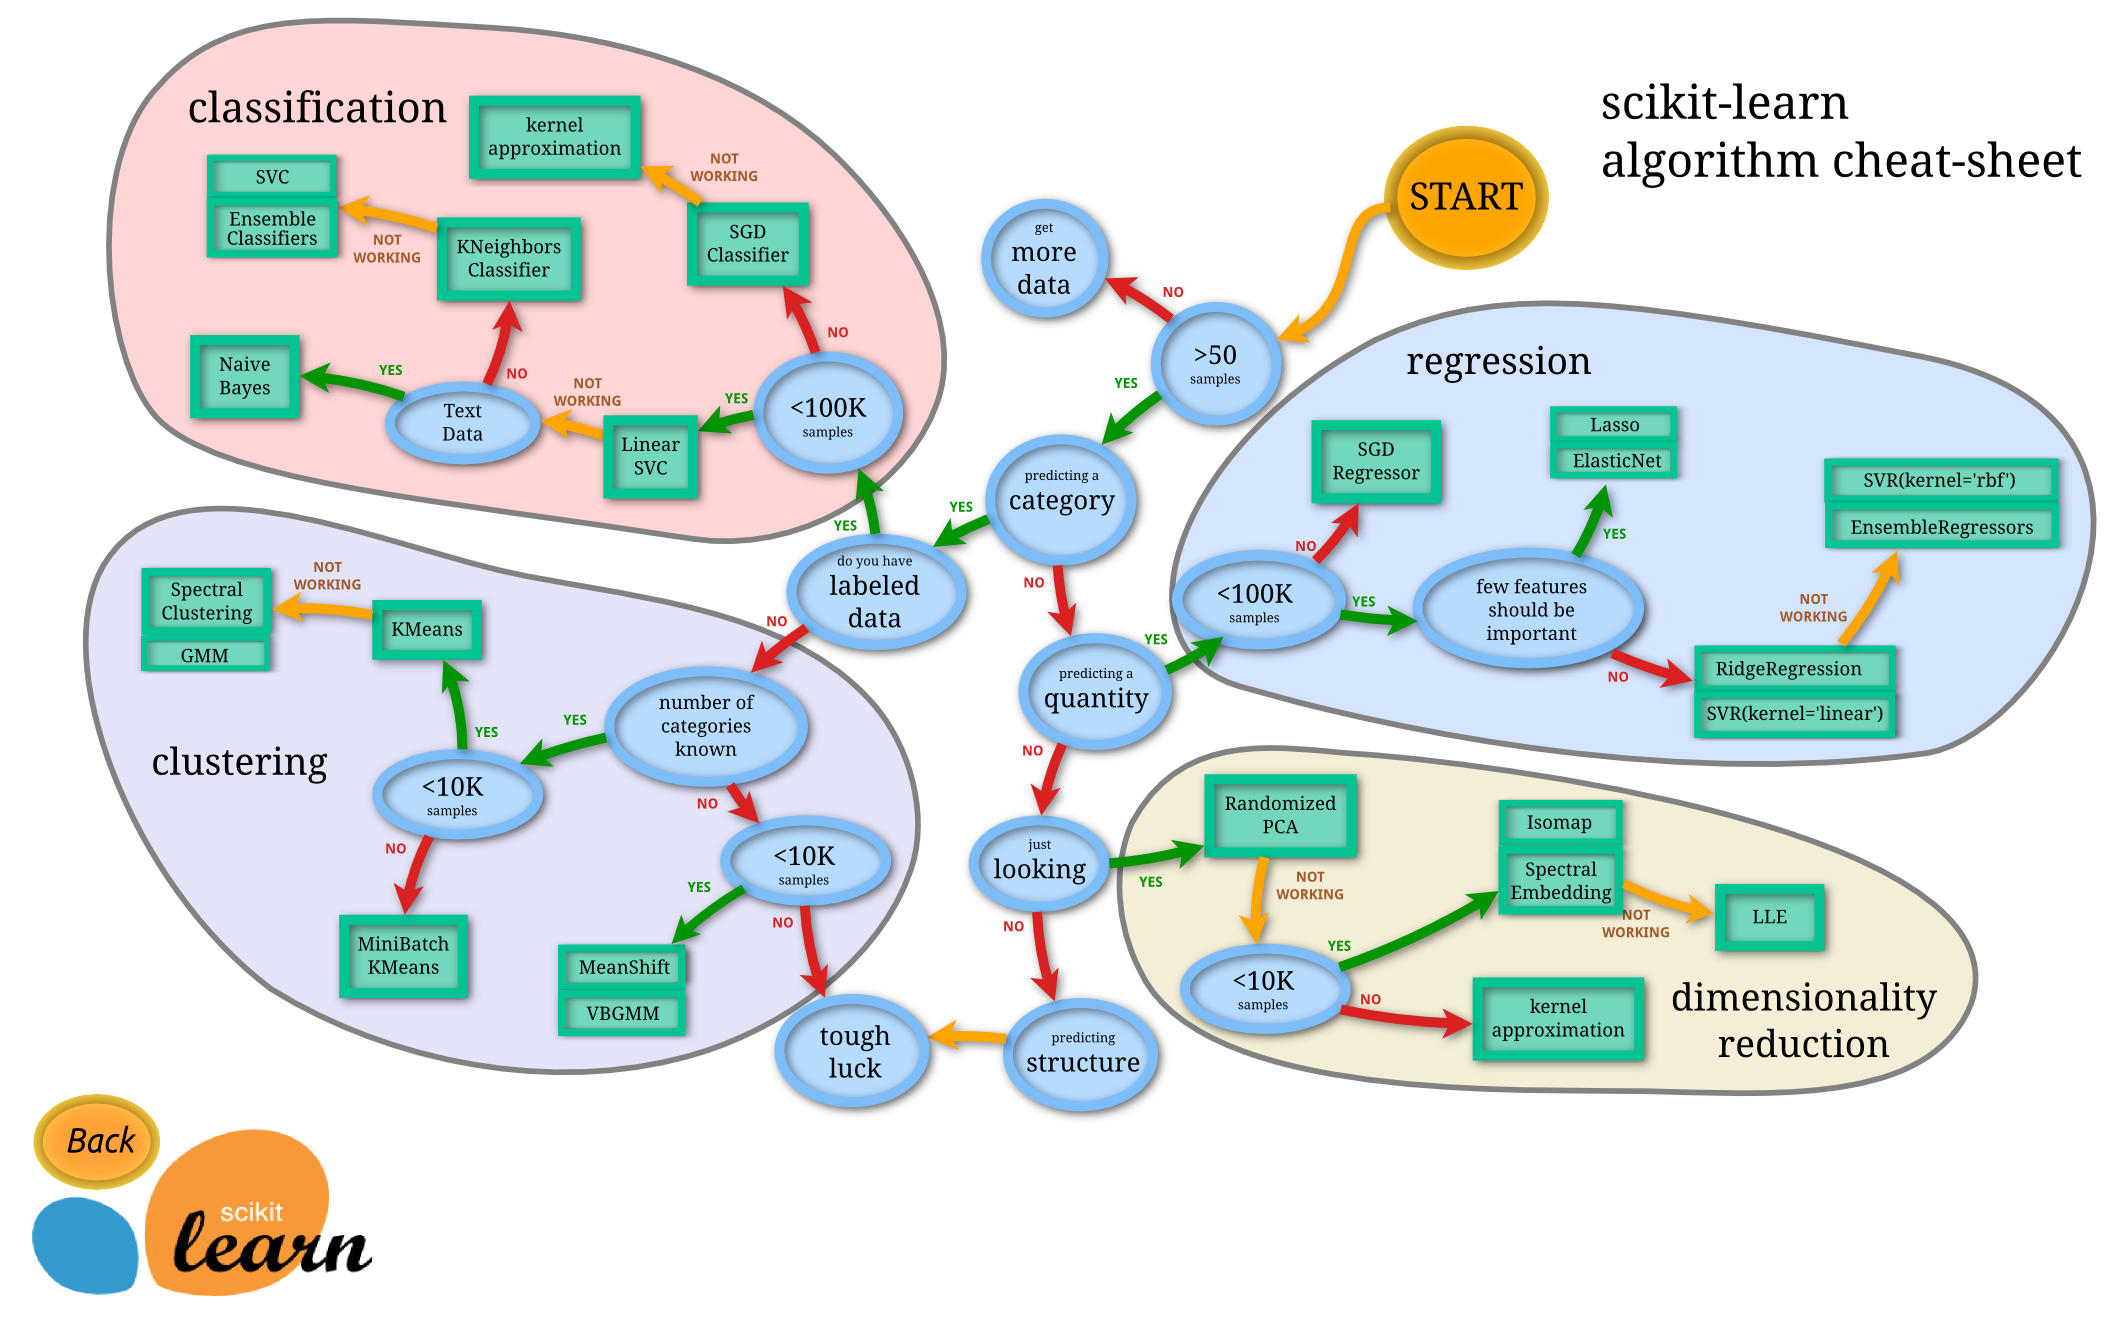

* There are more than 50 samples.
* Predicting a category.
* We have labeled data.
* There are more than 100k samples. (245725, 9)
* We can try to 'SGDClassifier', 'RandomForestClassfier'

In [43]:
# Firstly split data x & y
x = train_df.drop(['Is_Lead'], axis=1)
y = train_df['Is_Lead']
x.shape, y.shape

((245725, 8), (245725,))

In [44]:
# Split data into train and validation 
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((196580, 8), (49145, 8), (196580,), (49145,))

In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Fitting the model
models = {'SGDClassifier': SGDClassifier(),
          'Random_Forest_Classifier': RandomForestClassifier()}

def fit_and_score(model, x_train, x_val, y_train, y_val):
    '''
    This function will fitting data and model and 
    calculate the test score.
    '''
    # Set random seed (like random state, same function)
    np.random.seed(42)
    # Keep dictionaries model scores (train and validation)
    model_train_scores = {}
    model_scores ={}   
    # Fitting the model
    for name, model in models.items():
        model.fit(x_train, y_train)
        # Training score
        model_train_scores[name] = model.score(x_train, y_train) * 100        
        # Evaluate the model and append its score to model_scores (for validation)
        model_scores[name] = model.score(x_val, y_val) * 100
    return 'Validation scores', model_scores, 'Training scores', model_train_scores

In [47]:
model_scores = fit_and_score(model=models,
                             x_train=x_train,
                             x_val=x_val,
                             y_train=y_train,
                             y_val=y_val)
model_scores

('Validation scores',
 {'SGDClassifier': 73.42557737307966,
  'Random_Forest_Classifier': 84.0105809339709},
 'Training scores',
 {'SGDClassifier': 73.41235120561603,
  'Random_Forest_Classifier': 99.98677383253637})

We can see RandomForestClassifier has higher score than SGDClassifier in training score. Our model is better trained in the RandomForestClassifier module. We continue the with RandomForestClassifier.


Now, we can fitting again RandomForestClassifier module, tuning hyperparameters and evaluating metric scores.
* Accuracy
* F1_score
* Precision
* ROC Curve

Dataset is big dataset. we will make hyperparameter tuning with some of them and apply it to the general.


In [48]:
NUM_DATA = 10000 

In [49]:
a = train_df.drop(['Is_Lead'], axis=1)
b = train_df['Is_Lead']
a_train, a_val, b_train, b_val = train_test_split(a[:NUM_DATA],
                                                  b[:NUM_DATA],
                                                  test_size = 0.2,
                                                  random_state = 42)
a_train.shape, a_val.shape, b_train.shape, b_val.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [50]:
model_try = RandomForestClassifier()
model_try.fit(a_train, b_train)
model_try.score(a_val,b_val)

0.8285

In [51]:
from sklearn.model_selection import GridSearchCV
# Using GridSearchCV tuning the hyperparameters
# State the random seed
np.random.seed(42)
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ["auto"],
    'min_samples_leaf': [1,3],
    'min_samples_split': [2, 12],
    'n_estimators': [100, 200],
    'max_samples':[None]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = None, n_jobs = None)
grid_search.fit(a_train, b_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['auto'], 'max_samples': [None],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 12],
                         'n_estimators': [100, 200]})

In [52]:
grid_search.score(a_val, b_val)

0.8395

In [53]:
# This is our best parameters for RandomForestClassifier
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 200}

We will fit the model with best hyperparameters and evaluating score.

In [54]:
np.random.seed(42)
model_full = RandomForestClassifier(bootstrap = True,
  max_depth = None,
  max_features = 'auto',
  max_samples = None,
  min_samples_leaf = 1,
  min_samples_split = 12,
  n_estimators = 200)
# Fitting model
model_full.fit(x_train, y_train)
# Calculate model score
print('***Model score...***')
model_full.score(x_val, y_val)

***Model score...***


0.8569742598433208

Score is increased from 84.0105809339709 to 0.8569742598433208 with tuning hyperparameters.

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [56]:
y_pred = model_full.predict(x_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
# Accuracy Score
accuracy_score(y_val, y_pred) 

0.8569742598433208

**NOTE:**Accuracy score and `model_score` are same things.

In [58]:
# Confusion matrix
confusion_matrix(y_val, y_pred)

array([[35460,  2060],
       [ 4969,  6656]], dtype=int64)

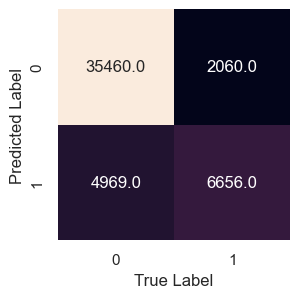

In [59]:
# Visualization confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    For confusion matrix visualization using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     fmt='.1f',
                     cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
plot_conf_mat(y_val, y_pred)

Precision is a measure of how many of the positive predictions made are correct (true positives).

In [60]:
# Precision score
precision_score(y_val, y_pred)

0.7636530518586507

Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

In [61]:
# Recall score
recall_score(y_val, y_pred)

0.5725591397849462

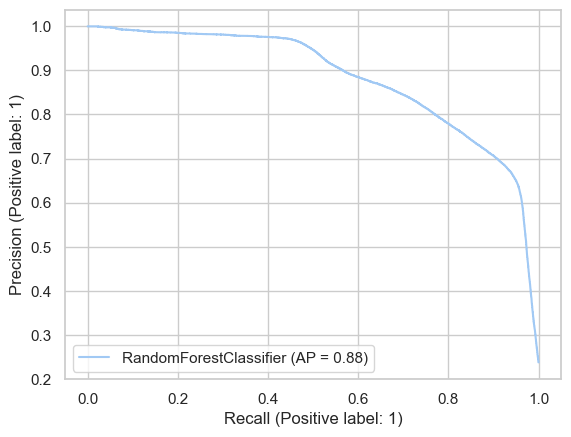

In [62]:
plot_precision_recall_curve(model_full, x, y)

F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two.

In [63]:
# f1 score
f1_score(y_val, y_pred)

0.6544417678580207

The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes.

In [64]:
# ROC_AUC score
roc_auc_score(y_val, y_pred)

0.7588275443061192

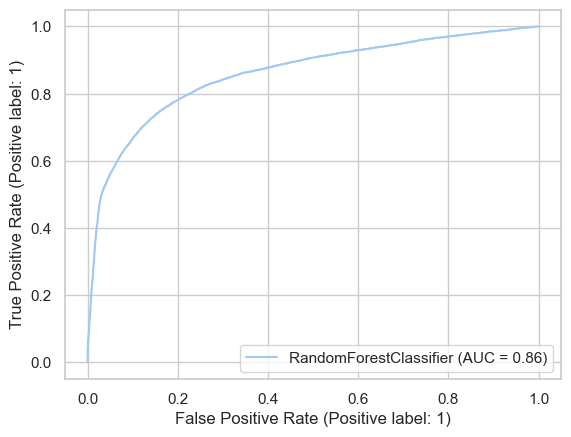

In [66]:
plot_roc_curve(model_full, x_val, y_val)  

In [67]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37520
           1       0.76      0.57      0.65     11625

    accuracy                           0.86     49145
   macro avg       0.82      0.76      0.78     49145
weighted avg       0.85      0.86      0.85     49145



The metric value of all labels can be displayed in the classification report.


Finally, we can predict Is_Lead value of test_df. Model is ready.  

In [68]:
test_df.head().T

,0,1,2,3,4
Gender,1,1,1,1,0
Age,29,43,31,29,29
Occupation,1,1,2,1,1
Channel_Code,0,1,0,0,0
Vintage,25,49,14,33,19
Credit_Product,1,2,0,0,0
Avg_Account_Balance,742366,925537,215949,868070,657087
Is_Active,0,0,0,0,0


In [74]:
model_full.predict_proba(test_df)

array([[0.39547914, 0.60452086],
       [0.81448638, 0.18551362],
       [0.87044966, 0.12955034],
       ...,
       [0.85672232, 0.14327768],
       [0.72293753, 0.27706247],
       [0.81496403, 0.18503597]])

In [76]:
Is_Lead_2 = model_full.predict(test_df)
Is_Lead_2

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
test_df['Is_Lead'] = Is_Lead_2

In [78]:
test_df.head().T

,0,1,2,3,4
Gender,1,1,1,1,0
Age,29,43,31,29,29
Occupation,1,1,2,1,1
Channel_Code,0,1,0,0,0
Vintage,25,49,14,33,19
Credit_Product,1,2,0,0,0
Avg_Account_Balance,742366,925537,215949,868070,657087
Is_Active,0,0,0,0,0
Is_Lead,1,0,0,0,0


Is_Lead_2 is the result of our predictions with the model we have created.
